# Regression Models
***

In [1]:
# Import necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import itertools
from sklearn import metrics

from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     RandomizedSearchCV, cross_val_score)

from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import scipy.stats as scs

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
                              
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,
RandomForestRegressor)

from sklearn.metrics import (classification_report, confusion_matrix, 
                             plot_confusion_matrix, precision_score, 
                             accuracy_score, recall_score, f1_score, roc_curve, 
                             auc)

from functions import *

plt.style.use('seaborn')

In [2]:
# Load dataset and ceate pd dataframes
raw_df = pd.read_csv('../DATA/raw_df.csv', index_col=0)

In [3]:
raw_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,popular
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,0
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


## Make a new dataframe with necessary information

In [4]:
df = raw_df[['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
             'energy', 'instrumentalness', 'liveness', 'loudness', 
          'speechiness', 'tempo', 'key', 'popularity']]

In [5]:
df.head()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,popularity
0,0.0594,1921,0.982,0.279,831667,0.211,0.878000,0.665,-20.096,0.0366,80.954,10,4
1,0.9630,1921,0.732,0.819,180533,0.341,0.000000,0.160,-12.441,0.4150,60.936,7,5
2,0.0394,1921,0.961,0.328,500062,0.166,0.913000,0.101,-14.850,0.0339,110.339,3,5
3,0.1650,1921,0.967,0.275,210000,0.309,0.000028,0.381,-9.316,0.0354,100.109,5,3
4,0.2530,1921,0.957,0.418,166693,0.193,0.000002,0.229,-10.096,0.0380,101.665,3,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170653 entries, 0 to 170652
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   danceability      170653 non-null  float64
 4   duration_ms       170653 non-null  int64  
 5   energy            170653 non-null  float64
 6   instrumentalness  170653 non-null  float64
 7   liveness          170653 non-null  float64
 8   loudness          170653 non-null  float64
 9   speechiness       170653 non-null  float64
 10  tempo             170653 non-null  float64
 11  key               170653 non-null  int64  
 12  popularity        170653 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 18.2 MB


***
# Linear Regression Models
***

## LR Model 1: Baseline model

### Define X and y

In [7]:
X = df.drop(['popularity'], axis=1)
y = df['popularity']

In [8]:
features = list(X)

### Linear model using statsmodels: Build OLS model and display summary

In [9]:
model_1 = build_sm_ols(df=df, features=features, 
                       target='popularity',
                       add_constant=True)

In [10]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 4.345e+04
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:06:25   Log-Likelihood:            -6.4882e+05
No. Observations:              170653   AIC:                         1.298e+06
Df Residuals:                  170640   BIC:                         1.298e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1289.5811      2.872   -449.053      0.000   -1295.210   -1283.952
valence              0.4817      0.142      3.401      0.001       0.204       0.759
year                 0.6699      0.001    465.989      0.000       0.667       0.673
acousticness        -4.2200      0.121    -34.790      0.000      -4.458      -3.982
danceability         2.8758      0.207     13.879      0.000       2.470       3.282
duration_ms       -4.09e-07   2.15e-07     -1.899      0.058   -8.31e-07    1.32e-08
energy              -1.6553      0.218     -7.604      0.000      -2.082      -1.229
instrumentalness    -4.1200      0.097    -42.348      0.000      -4.311      -3.929
liveness            -2.9622      0.157    -18.833      0.000      -3.270      -2.654
loudness             0.0195      0.008      2.376      0.018       0.003       0.036
speechiness         -7.0191      0.183    -38.415      0.000      -7.377      -6.661
tempo                0.0017      0.001      1.836      0.066      -0.000       0.003
key                  0.0028      0.007      0.370      0.711      -0.012       0.017
==============================================================================
Omnibus:                    18061.970   Durbin-Watson:                   0.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155492.608
Skew:                           0.112   Prob(JB):                         0.00
Kurtosis:                       7.671   Cond. No.                     2.88e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plot Residuals

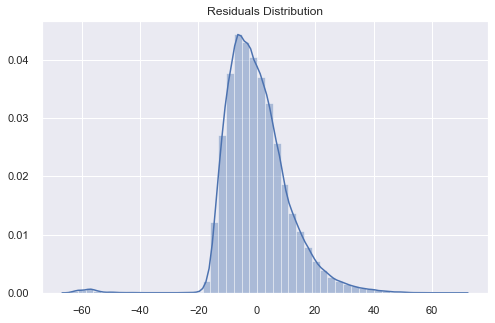

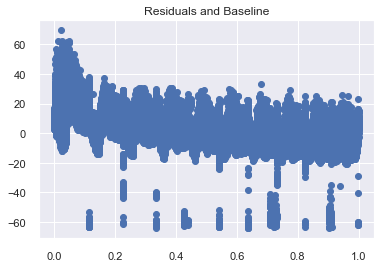

In [11]:
plot_residuals(model_1)

### QQ Plot

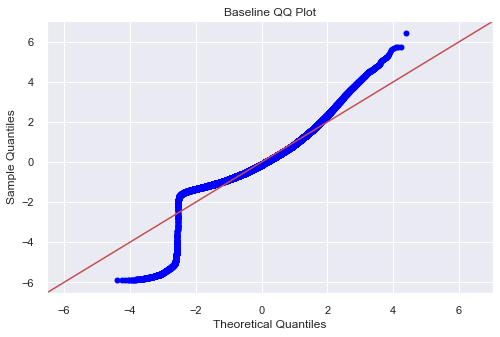

In [12]:
qqplot(model=model_1, title='Baseline QQ Plot')

### Linear regression using scikit-learn

In [13]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [14]:
linreg.coef_

array([ 4.81694069e-01,  6.69889460e-01, -4.21997992e+00,  2.87584872e+00,
       -4.09008506e-07, -1.65525916e+00, -4.12000765e+00, -2.96220614e+00,
        1.94749089e-02, -7.01911613e+00,  1.65271117e-03,  2.76689551e-03])

In [15]:
linreg.intercept_

-1289.5811117759038

***
## LR Model 2: Baseline model with train_test_split and scaling
In the first baseline model I created, I did not train_test_split or scale the data so I will do so for this model.

### Define X and y

In [16]:
X = df.drop(['popularity'], axis=1)
y = list(df['popularity'])

### Train-test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

### Scale

In [18]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns,
                       index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns,
                      index=X_test.index)

### Linear regression using scikit-learn

In [19]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [20]:
# Comparing the r-squared values for train and test models
linreg.score(X_train, y_train), linreg.score(X_test, y_test)

(0.7520866308866739, 0.7574886631622677)

In [21]:
linreg.coef_

array([ 1.33736896e-01,  1.73475182e+01, -1.59624451e+00,  5.00619971e-01,
       -4.57377708e-02, -4.77630584e-01, -1.30287129e+00, -5.16904227e-01,
        1.29719440e-01, -1.13379531e+00,  2.32654549e-02, -1.02054093e-02])

In [22]:
linreg.intercept_

31.454976599551554

***
## LR Model 3: Cross Validation
I will use cross validation on a model to determine optimal model performance

### Define X and y

In [23]:
X = df.drop(['popularity'], axis=1)
y = list(df['popularity'])

### Train-test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

### Linear regression using scikit-learn

In [25]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = linreg.predict(X_test)

### Squared Mean Error score and Mean Absolute Error

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, pred)
test_rmse = np.sqrt(test_mse)
print("The test MSE is:", test_mse)
print("The test RMSE is:", test_rmse)

# See our Mean Absolute Error
test_mae = mean_absolute_error(y_test, pred)
print("The test MAE is:", test_mae)

The test MSE is: 115.77867992307054
The test RMSE is: 10.760050182181798
The test MAE is: 7.991540027922924


### Cross Validation

In [31]:
cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [33]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-147.88594088366025
-132.189105711753
-127.26436089027675


***
## LR Model 4: Removing outliers
In the "Data Scrubbing and EDA" file within the notebooks section of this repo, I created boxplots of various features within this dataset. I saw that many features had outliers within them so for this model I will be removing them. I will 